# Submission

Put the ipynb file and html file in the github branch you created in the last assignment and submit the link to the commit in brightspace

In [1]:
from plotly.offline import init_notebook_mode
import plotly.io as pio
import plotly.express as px

init_notebook_mode(connected=True)
pio.renderers.default = "plotly_mimetype+notebook"

In [2]:
#load data
df = px.data.gapminder()
df.head()

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0  Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1  Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2  Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3  Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4  Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   

   iso_num  
0        4  
1        4  
2        4  
3        4  
4        4

## Question 1:

Recreate the barplot below that shows the population of different continents for the year 2007. 

*Hints:*

- Extract the 2007 year data from the dataframe. You have to process the data accordingly
- use [plotly bar](https://plotly.com/python-api-reference/generated/plotly.express.bar)
- Add different colors for different continents
- Sort the order of the continent for the visualisation. Use [axis layout setting](https://plotly.com/python/reference/layout/xaxis/)
- Add text to each bar that represents the population 

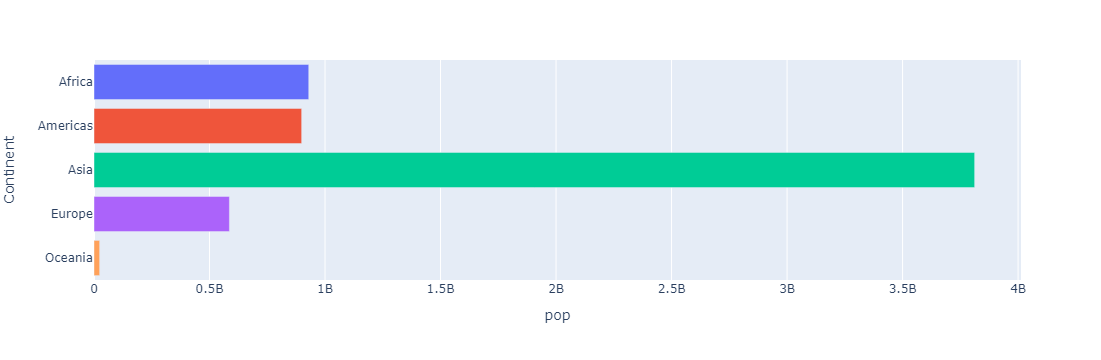

In [14]:
df_2007 = df[df['year']==2007]
df_2007_new = df_2007.groupby('continent').sum()
fig = px.bar(df_2007_new, x = 'pop', y = df_2007_new.index, orientation = 'h', color = df_2007_new.index)
fig.update_layout(showlegend=False)

fig.update_yaxes(title_text="Continent")
fig.show()

## Question 2:

Sort the order of the continent for the visualisation

Hint: Use [axis layout setting](https://plotly.com/python/reference/layout/xaxis/)

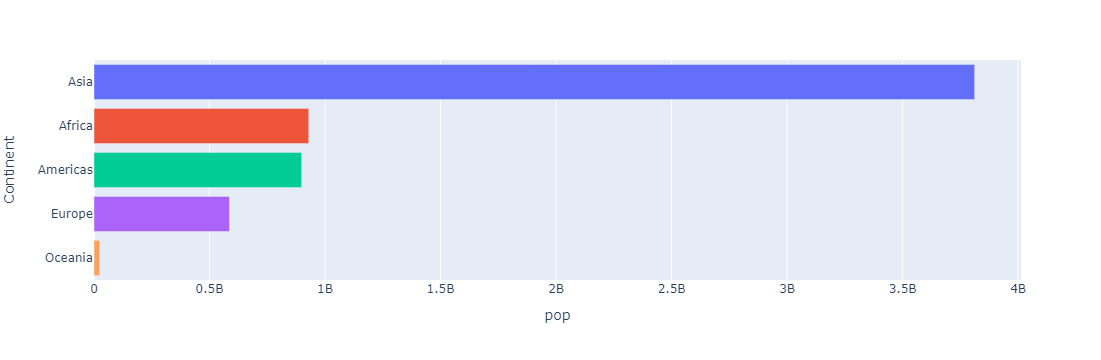

In [15]:
# YOUR CODE HERE
df_2007 = df[df['year']==2007]
df_2007_new = df_2007.groupby('continent').sum().sort_values('pop', ascending = False)
fig = px.bar(df_2007_new, x = 'pop', y = df_2007_new.index, orientation = 'h', color = df_2007_new.index)
fig.update_layout(showlegend=False)
fig.update_yaxes(title_text="Continent")
fig.show()

## Question 3:

Add text to each bar that represents the population 

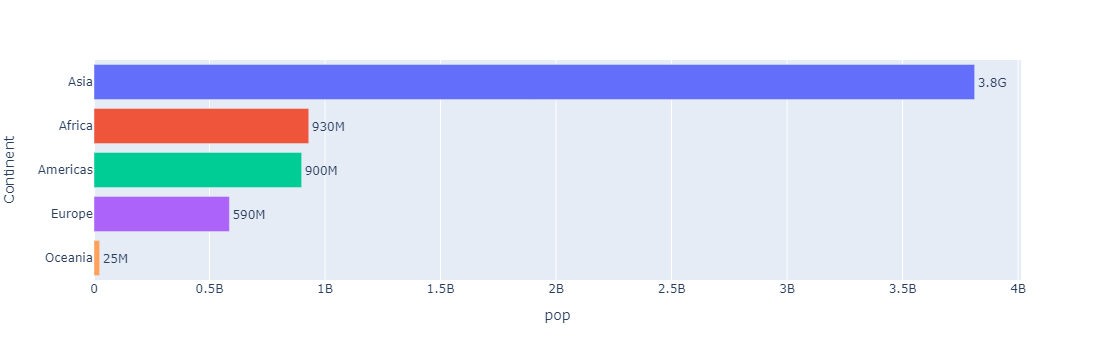

In [16]:
# YOUR CODE HERE
df_2007 = df[df['year']==2007]
df_2007_new = df_2007.groupby('continent').sum().sort_values('pop', ascending=False)
fig = px.bar(df_2007_new, x = 'pop', y = df_2007_new.index, orientation = 'h', color = df_2007_new.index)
fig.update_layout(showlegend=False)
fig.update_traces(texttemplate='%{x:.2s}', textposition='outside')
fig.update_yaxes(title_text="Continent")
fig.show()

## Question 4:

Thus far we looked at data from one year (2007). Lets create an animation to see the population growth of the continents through the years


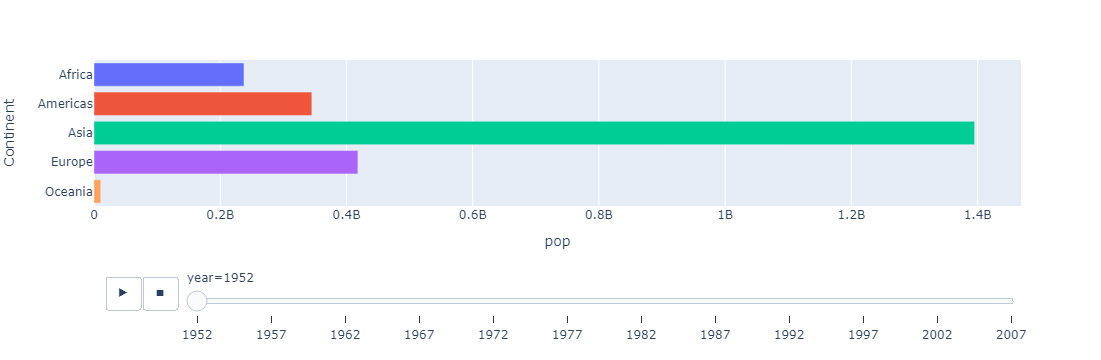

In [18]:
# YOUR CODE HERE
df_2007_new = df.groupby(['year', 'continent']).sum().reset_index()
fig = px.bar(df_2007_new, x='pop', y='continent', animation_frame='year', animation_group="continent",
            orientation = 'h', color = 'continent')
fig.update_layout(showlegend=False)
#fig.update_traces(texttemplate='%{x:.2s}', textposition='outside')
fig.update_yaxes(title_text="Continent")
fig.show()

## Question 5:

Instead of the continents, lets look at individual countries. Create an animation that shows the population growth of the countries through the years

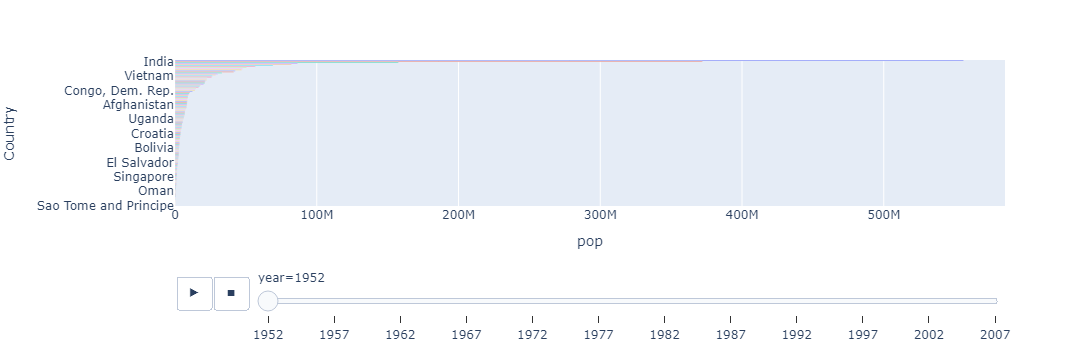

In [19]:
# YOUR CODE HERE
df_2007_new = df.groupby(['year', 'country']).sum().reset_index()
df_2007_new = df_2007_new.sort_values(by=['year', 'pop'], ascending=[True, False])
fig = px.bar(df_2007_new, x='pop', y='country', animation_frame='year', animation_group="country",
            orientation = 'h', color = 'country')
fig.update_layout(showlegend=False)
fig.update_yaxes(title_text="Country")
fig.show()

## Question 6:

Clean up the country animation. Set the height size of the figure to 1000 to have a better view of the animation

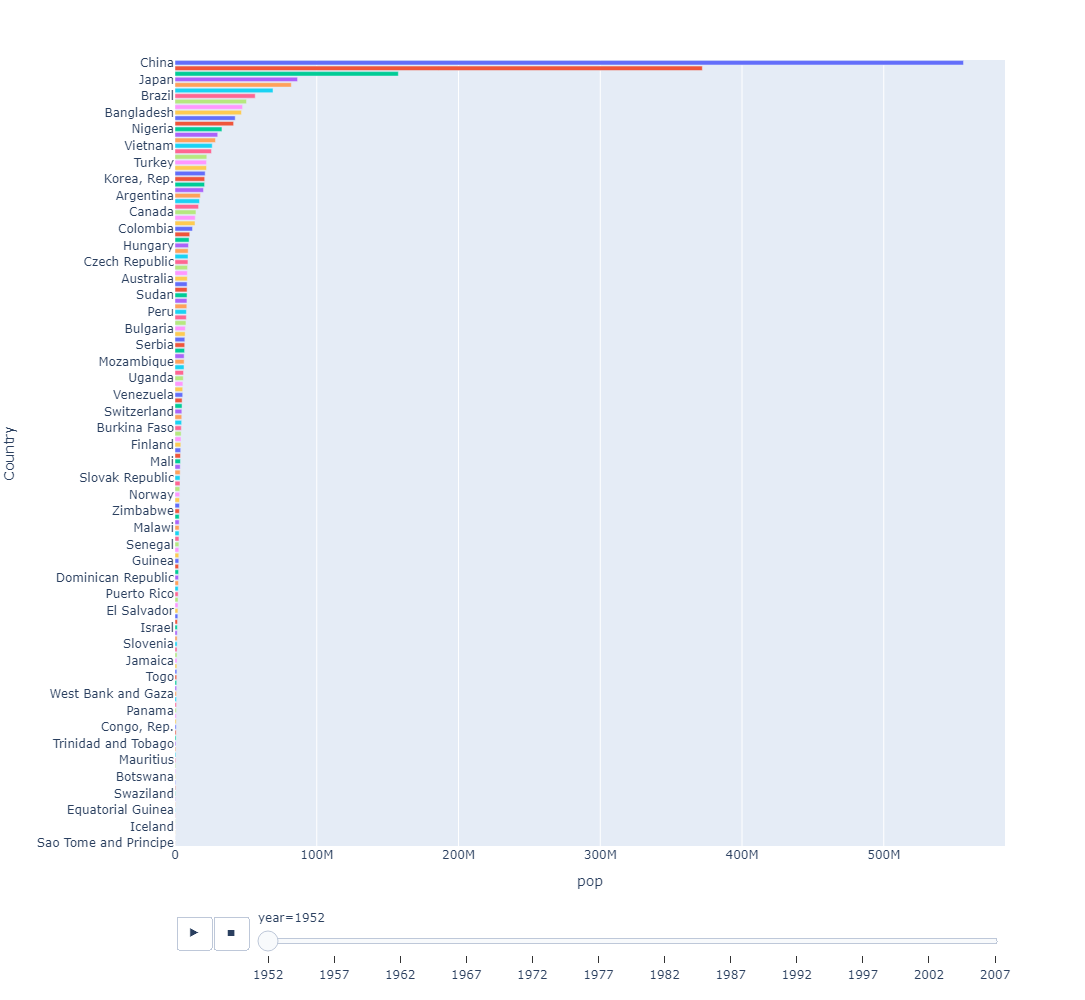

In [20]:
# YOUR CODE HERE
df_2007_new = df.groupby(['year', 'country']).sum().reset_index()
df_2007_new = df_2007_new.sort_values(by=['year', 'pop'], ascending=[True, False])
fig = px.bar(df_2007_new, x='pop', y='country', animation_frame='year', animation_group="country",
            orientation = 'h', color = 'country')
fig.update_layout(showlegend=False, height=1000)
fig.update_yaxes(title_text="Country")
fig.show()

## Question 7:

Show only the top 10 countries in the animation

Hint: Use the axis limit to set this. 

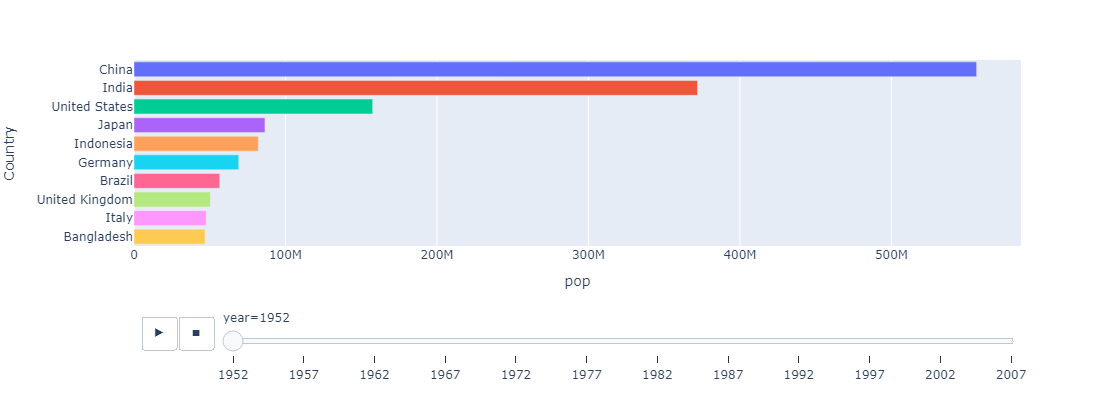

In [21]:
# YOUR CODE HERE
df_2007_new = df.groupby(['year', 'country']).sum().reset_index()
df_2007_new = df_2007_new.sort_values(by=['year', 'pop'], ascending=[True, False])
top_10 = df_2007_new.groupby('year').head(10)
fig = px.bar(top_10, x='pop', y='country', animation_frame='year', animation_group="country",
            orientation = 'h', color = 'country')
fig.update_layout(showlegend=False, height=400)
fig.update_yaxes(title_text="Country")
fig.show()